# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Introduction:
My data set is related to predict heart patient based on some of the sysmsent and and other featuers. It is importtant to understand who, what and how before we analuse and provide visulations and prediction with data. Below is the story with my data set.

Who:
Main autident is my data is healthcare professions  who can predict heart desese and conditions based on patients details. 

What:
Dataset contains usefull featrure like cholesterol, blood pressure, age. that correlate with heart disease occurrence.

How:


# 3. Homework - work with your own data

In [125]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [126]:
# Load the dataset
file_path = "heart.csv"
df_heart = pd.read_csv(file_path)

In [127]:
# Summarize dataset
print(df_heart.info())
print(df_heart.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1025 non-null   int64  
 1   age         1025 non-null   int64  
 2   sex         1025 non-null   int64  
 3   cp          1025 non-null   int64  
 4   trestbps    1025 non-null   int64  
 5   chol        1025 non-null   int64  
 6   fbs         1025 non-null   int64  
 7   restecg     1025 non-null   int64  
 8   thalach     1025 non-null   int64  
 9   exang       1025 non-null   int64  
 10  oldpeak     1025 non-null   float64
 11  slope       1025 non-null   int64  
 12  ca          1025 non-null   int64  
 13  thal        1025 non-null   int64  
 14  target      1025 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 120.2 KB
None
        Unnamed: 0          age          sex           cp     trestbps  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.

In [128]:
# First try to find duplcates 
duplicate_r=df_heart[df_heart.duplicated()]

print("Actual duplicated rows:")
if len(duplicate_r)> 0:
    print(duplicate_r)
else:
    print("\n No Duplicated records are avaialble")
    print(" Number of unique records : ",len(df_heart))

Actual duplicated rows:

 No Duplicated records are avaialble
 Number of unique records :  1025


In [129]:
# Review heart df contents
df_heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [130]:
# There are no important columns which can remove with duplication 
# But looks like 'Unnamed: 0' is not required for EDA or and data analisis.
# So dropping this column

df_heart_clean = df_heart.drop(columns=['Unnamed: 0']).copy()

#Review first rows
df_heart_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [131]:
# Calculating mean, median, and mode
mean_values = round(df_heart_clean.mean(),1)
median_values = df_heart_clean.median()
mode_values = df_heart_clean.mode().iloc[0]

# Combining into a single DataFrame
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

# Display the results
print(summary_stats)

           Mean  Median   Mode
age        54.4    56.0   58.0
sex         0.7     1.0    1.0
cp          0.9     1.0    0.0
trestbps  131.6   130.0  120.0
chol      246.0   240.0  204.0
fbs         0.1     0.0    0.0
restecg     0.5     1.0    1.0
thalach   149.1   152.0  162.0
exang       0.3     0.0    0.0
oldpeak     1.1     0.8    0.0
slope       1.4     1.0    1.0
ca          0.8     0.0    0.0
thal        2.3     2.0    2.0
target      0.5     1.0    1.0


In [132]:
# THere are no noticeble inconsistencies in the data

In [133]:
# I want to first check is there any null values. This is provide null values in each column
missing_values = df_heart_clean.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [134]:
#There are no null values in any columns
# We can use dropna method if nulls are available

In [135]:
#Validate data types to find categorical values

print(" Checck datatypes and categorical values")
print(df_heart_clean.dtypes)

 Checck datatypes and categorical values
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [136]:
## There are no categorical value in the DF
# We can use pd.get_dummies() method is we have categorical values to handle

In [137]:
# Checking if the data is usable and no missing values
# validated in earler code


In [138]:

# Checking for class imbalance in 'target' column
if 'target' in df_heart_clean.columns:
    class_counts = df_heart_clean['target'].value_counts(dropna=False)
    print("\nClass Distribution in 'target' column:\n", class_counts)
    
    imbalance_threshold = 0.1  # Example threshold for imbalance
    total = class_counts.sum()
    imbalance = class_counts / total < imbalance_threshold
    
    if imbalance.any():
        print("\nClass imbalance detected in 'target' column.")
    else:
        print("\nNo significant class imbalance detected in 'target' column.")
else:
    print("\n'Target' column not found in the dataset.")


Class Distribution in 'target' column:
 target
1    526
0    499
Name: count, dtype: int64

No significant class imbalance detected in 'target' column.


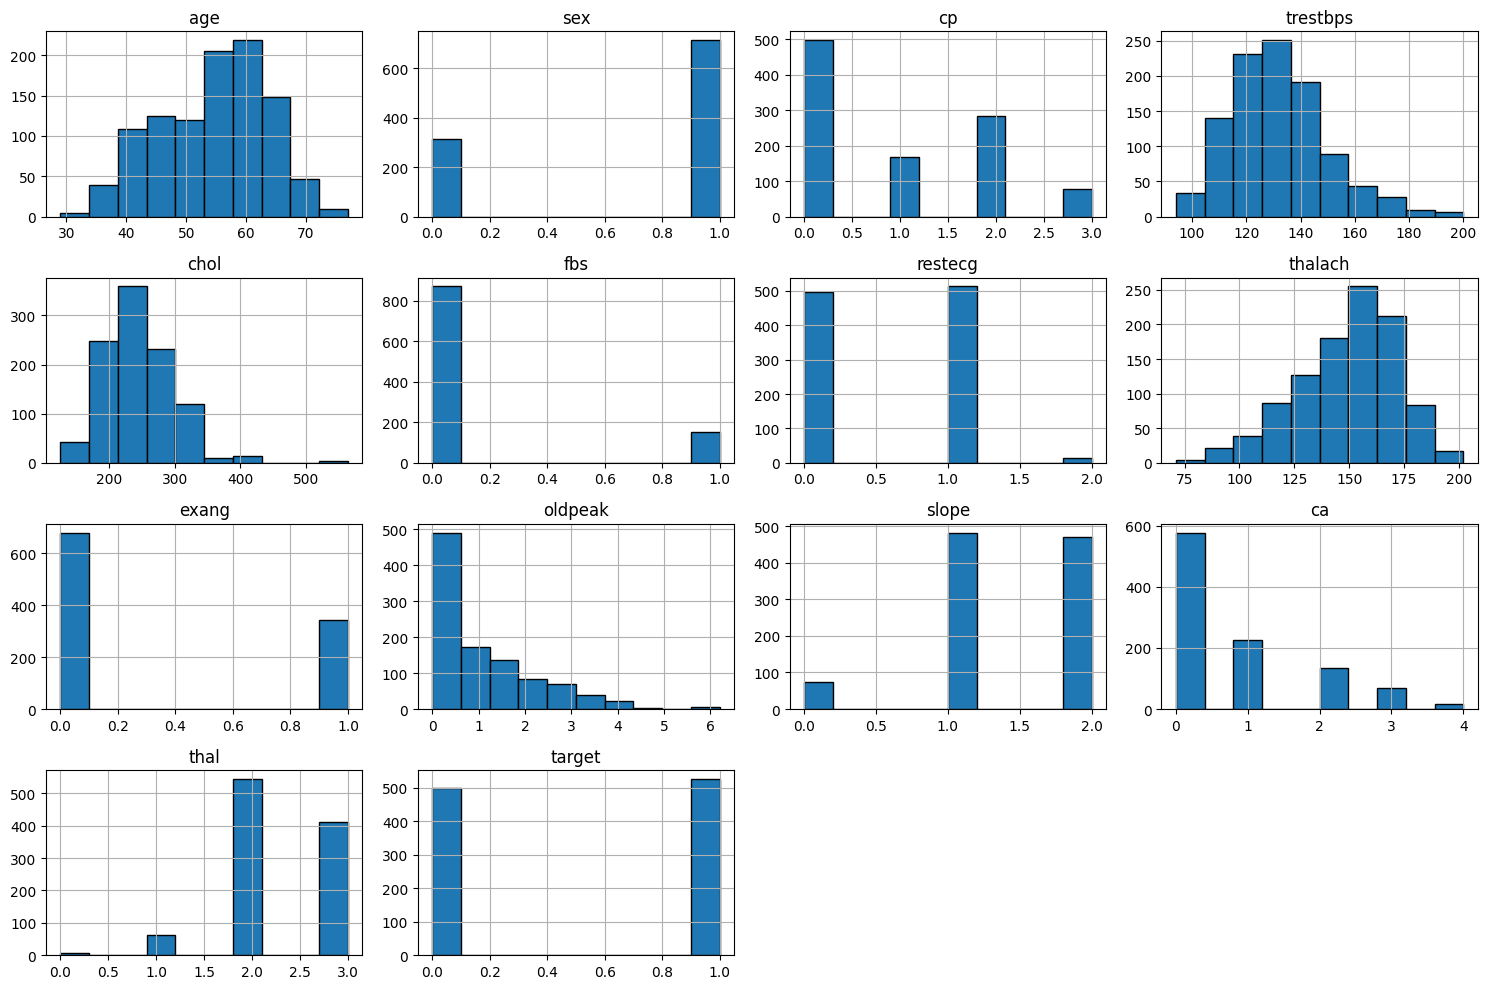

In [139]:
# Creating histograms for each numeric column
df_heart_clean.hist(bins=10, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

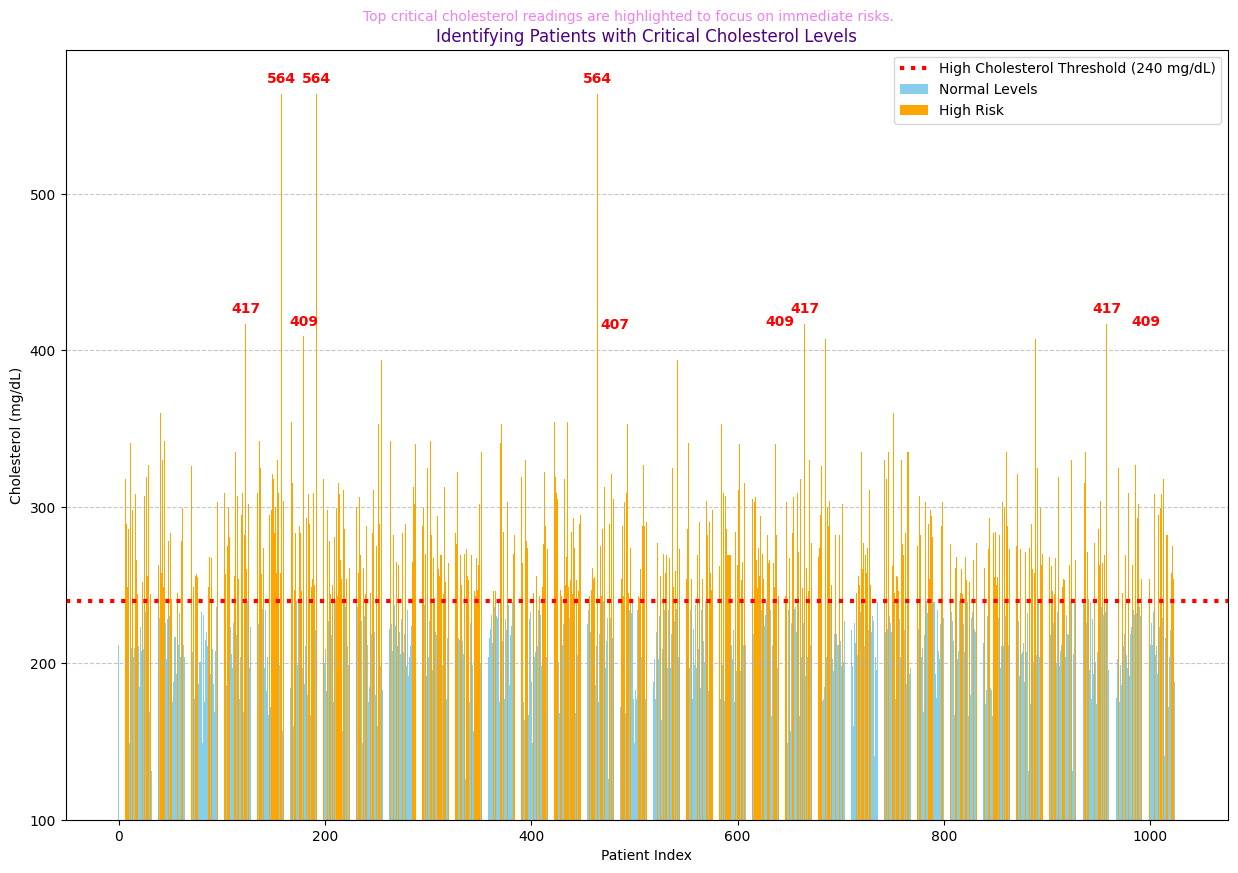

In [140]:
# Simplified and cleaner bar chart focusing on key high-risk individuals
#df_heart_clean = df_heart_clean[df_heart_clean['chol'] > 150].copy()



plt.figure(figsize=(15, 10))


# Highlighting patients with cholesterol levels above 200 mg/dL
high_chol_threshold = 240
high_chol_patients = df_heart_clean[df_heart_clean['chol'] > high_chol_threshold]

plt.bar(df_heart_clean.index, df_heart_clean['chol'], color='skyblue', label='Normal Levels')
plt.bar(high_chol_patients.index, high_chol_patients['chol'], color='orange', label='High Risk')

# Annotating only the top 2 highest cholesterol values
top_high_risks = high_chol_patients.sort_values(by='chol', ascending=False).head(10)
for idx, val in zip(top_high_risks.index, top_high_risks['chol']):
    plt.text(idx, val + 5, f'{val}', ha='center', va='bottom', color='red', fontsize=10, weight='bold')

plt.title('Identifying Patients with Critical Cholesterol Levels', fontsize=12,color='indigo')
plt.xlabel('Patient Index')
plt.ylabel('Cholesterol (mg/dL)')
plt.axhline(y=high_chol_threshold, color='red', linestyle=':', linewidth=3, label='High Cholesterol Threshold (240 mg/dL)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(100)

# Storytelling subtitle
plt.suptitle('Top critical cholesterol readings are highlighted to focus on immediate risks.', fontsize=10, y=0.92, color='violet')

plt.show()



In [141]:
# We added here patients with high cholesterol levels and added annotations to tell a clearer story about cardiovascular risk. THis highlited the patient have a high risk on heart deseases.